 1. Прочитайте базу my_PJME_MW.csv и сделайте ее перрасчет (ресемплинг) в представление по 1 месяцу.

In [1]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error
import os

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [2]:
Path_Energy = 'my_PJME_MW.csv'
data = pd.read_csv(Path_Energy, index_col=[0], parse_dates=[0])
m_data=data.resample('M').mean()
m_data.head()

,PJME_MW,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,hour,is_holiday,is_prev_holiday,is_next_holiday
Date,,,,,,,,,,,,
2002-01-31,31075.399731,2002.0,1.0,16.020188,1.0,16.020188,2.873486,2.905787,11.515478,0.063257,0.032301,0.064603
2002-02-28,30239.166667,2002.0,2.0,14.500000,1.0,45.500000,7.071429,3.000000,11.500000,0.035714,0.035714,0.035714
2002-03-31,28875.256720,2002.0,3.0,16.000000,1.0,75.000000,11.258065,3.193548,11.500000,0.000000,0.000000,0.000000
2002-04-30,28534.731572,2002.0,4.0,15.511822,2.0,105.511822,15.668985,2.828929,11.511822,0.000000,0.000000,0.000000
2002-05-31,28073.653226,2002.0,5.0,16.000000,2.0,136.000000,20.000000,3.000000,11.500000,0.032258,0.032258,0.032258


 2. Подберите параметры модели SARIMAX для этого ряда.

In [3]:
import itertools

# Определим p, d и q в диапазоне 0-3
p = d = q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))
# зададим сезонность p, q и q

p = [0] 
d = [0,1]
q = range(0, 3)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[1]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 0, 12)
SARIMAX: (0, 0, 2) x (0, 0, 1, 12)


In [4]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-12],order=param,
                                    seasonal_order=param_seasonal ,
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}3 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)3 - AIC:4416.269672223332
ARIMA(0, 0, 0)x(0, 0, 1, 12)3 - AIC:4015.3605742791406
ARIMA(0, 0, 0)x(0, 0, 2, 12)3 - AIC:3714.465932811031
ARIMA(0, 0, 0)x(0, 1, 0, 12)3 - AIC:3153.6893700282526
ARIMA(0, 0, 0)x(0, 1, 1, 12)3 - AIC:2927.716207132723
ARIMA(0, 0, 0)x(0, 1, 2, 12)3 - AIC:2695.32231718415
ARIMA(0, 0, 1)x(0, 0, 0, 12)3 - AIC:4259.47936122137
ARIMA(0, 0, 1)x(0, 0, 1, 12)3 - AIC:4012.922621937122
ARIMA(0, 0, 1)x(0, 0, 2, 12)3 - AIC:3675.425501353196
ARIMA(0, 0, 1)x(0, 1, 0, 12)3 - AIC:3114.0230156115686
ARIMA(0, 0, 1)x(0, 1, 1, 12)3 - AIC:2890.475757781236
ARIMA(0, 0, 1)x(0, 1, 2, 12)3 - AIC:2653.7508364118203
ARIMA(0, 0, 2)x(0, 0, 0, 12)3 - AIC:4206.520029701765
ARIMA(0, 0, 2)x(0, 0, 1, 12)3 - AIC:3925.5304732000263
ARIMA(0, 0, 2)x(0, 0, 2, 12)3 - AIC:3653.2702719996046
ARIMA(0, 0, 2)x(0, 1, 0, 12)3 - AIC:3099.1118556134224
ARIMA(0, 0, 2)x(0, 1, 1, 12)3 - AIC:2874.774805687261
ARIMA(0, 0, 2)x(0, 1, 2, 12)3 - AIC:2642.7927718352857
ARIMA(0, 1, 0)x(0, 0, 

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 0, 1)x(0, 1, 2, 12)3 - AIC:2657.1098455821893
ARIMA(2, 0, 2)x(0, 0, 0, 12)3 - AIC:3460.9246118941173
ARIMA(2, 0, 2)x(0, 0, 1, 12)3 - AIC:3253.507307359786
ARIMA(2, 0, 2)x(0, 0, 2, 12)3 - AIC:2955.064145297836
ARIMA(2, 0, 2)x(0, 1, 0, 12)3 - AIC:3101.2063332592834
ARIMA(2, 0, 2)x(0, 1, 1, 12)3 - AIC:2859.746186783569
ARIMA(2, 0, 2)x(0, 1, 2, 12)3 - AIC:2642.7919994673775
ARIMA(2, 1, 0)x(0, 0, 0, 12)3 - AIC:3449.7072047673273
ARIMA(2, 1, 0)x(0, 0, 1, 12)3 - AIC:3225.27789913801
ARIMA(2, 1, 0)x(0, 0, 2, 12)3 - AIC:2994.9793034999107
ARIMA(2, 1, 0)x(0, 1, 0, 12)3 - AIC:3123.099971073302
ARIMA(2, 1, 0)x(0, 1, 1, 12)3 - AIC:2884.581026789987
ARIMA(2, 1, 0)x(0, 1, 2, 12)3 - AIC:2663.454290622658
ARIMA(2, 1, 1)x(0, 0, 0, 12)3 - AIC:3348.2043739769415
ARIMA(2, 1, 1)x(0, 0, 1, 12)3 - AIC:3124.6928766756037
ARIMA(2, 1, 1)x(0, 0, 2, 12)3 - AIC:2911.1456664778875
ARIMA(2, 1, 1)x(0, 1, 0, 12)3 - AIC:3125.104894328377
ARIMA(2, 1, 1)x(0, 1, 1, 12)3 - AIC:2846.588603675163
ARIMA(2, 1, 1)x(0, 1

Лучшие результаты на помесячных данных параметры модели SARIMA (0, 1, 2)x(0, 1, 2, 12)3 - AIC:2613.007536104311

In [5]:
q = 2
p = 0
d = 1
pdq = [p, d, q]

N2=12
warnings.filterwarnings("ignore") # отключает предупреждения

modb = sm.tsa.statespace.SARIMAX(m_data['PJME_MW'].values[:-N2],
                               order=pdq,seasonal_order=[0,1,2,12], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[0, 1, 2] - AIC:2626.991234437127
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  188
Model:             SARIMAX(0, 1, 2)x(0, 1, 2, 12)   Log Likelihood               -1306.496
Date:                            Tue, 04 Aug 2020   AIC                           2626.991
Time:                                    10:40:06   BIC                           2647.972
Sample:                                         0   HQIC                          2635.516
                                            - 188                                         
Covariance Type:                              opg                                         
========================================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.

 3. Сделайте вывод о том, как изменилась модель по сравнению с недельной.

Модель на помесячных данных имеет значение критерия AIC в 3,5 раза меньше, чем на понедельных, т.е., значения по месяцам прогнозируются гораздо лучше.

 4. Возмите вариант 1 или 2

- Вариант 1) - Постройте ACF, PACF и модель ARIMA для BRENT (недельный ресемплинг)
- Вариант 2) - Постройте ACF, PACF и модель ARIMA для СOVID_19 (по любой стране кроме Китая на дневных графиках )

In [6]:
path_brent = 'my_BRENT2019.csv'
brent_data = pd.read_csv(path_brent,sep = ',', index_col=[0], parse_dates=[0])
w_brent_data=brent_data.resample('W').mean()
w_brent_data.head()

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2010-09-05,76.616000,2010.0,9.000000,3.000000,3.000000,246.000000,35.0,4.000000,0.000000,0.2,0.000000
2010-09-12,77.673333,2010.0,9.000000,8.500000,3.000000,251.500000,36.0,2.500000,0.166667,0.0,0.166667
2010-09-19,78.693333,2010.0,9.000000,15.666667,3.000000,258.666667,37.0,2.666667,0.000000,0.0,0.000000
2010-09-26,78.518333,2010.0,9.000000,22.666667,3.000000,265.666667,38.0,2.666667,0.000000,0.0,0.000000
2010-10-03,81.211667,2010.0,9.333333,19.666667,3.333333,272.666667,39.0,2.666667,0.000000,0.0,0.000000


Text(0.5, 0, 't')

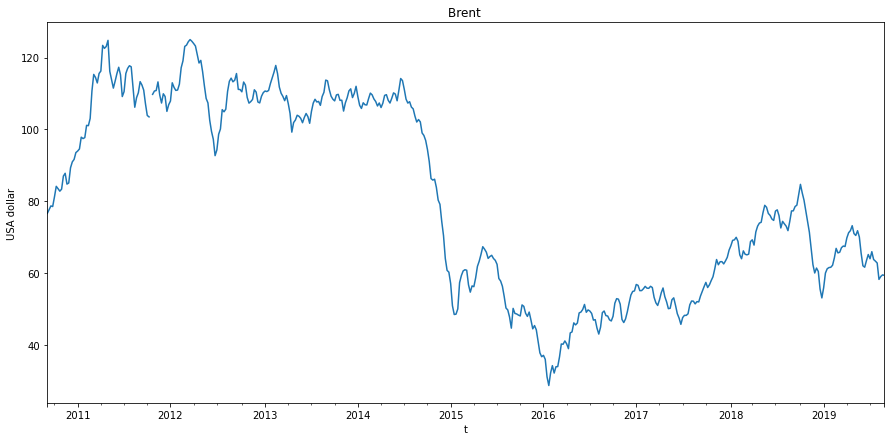

In [7]:
_ = w_brent_data['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

In [8]:
w_brent_data['2011-10-01' : '2011-10-31']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


In [9]:
# заполним пропуск средними между соседними значениями:
# w_brent_data.loc['2011-10-16'] = [(103.476667+109.756667)/2, 2011.0, 10.000000, (5.666667+21.333333)/2, 4.000000, (278.666667+294.333333)/2, 41.0, 2.666667, 0.000000, 0.000000, 0.000000]
w_brent_data.loc['2011-10-16'] = (w_brent_data.loc['2011-10-09'] + w_brent_data.loc['2011-10-23'])/2

In [10]:
w_brent_data['2011-10-01' : '2011-10-31']

,Значение,year,month,dayofmonth,quarter,dayofyear,weekofyear,dayofweek,is_holiday,is_prev_holiday,is_next_holiday
Дата,,,,,,,,,,,
2011-10-02,103.878333,2011.0,9.166667,23.666667,3.166667,271.666667,39.0,2.666667,0.0,0.000000,0.0
2011-10-09,103.476667,2011.0,10.000000,5.666667,4.000000,278.666667,40.0,2.666667,0.0,0.166667,0.0
2011-10-16,106.616667,2011.0,10.000000,13.500000,4.000000,286.500000,41.0,3.500000,0.0,0.083333,0.0
2011-10-23,109.756667,2011.0,10.000000,21.333333,4.000000,294.333333,42.0,4.333333,0.0,0.000000,0.0
2011-10-30,110.680000,2011.0,10.000000,26.666667,4.000000,299.666667,43.0,2.666667,0.0,0.000000,0.0


Text(0.5, 0, 't')

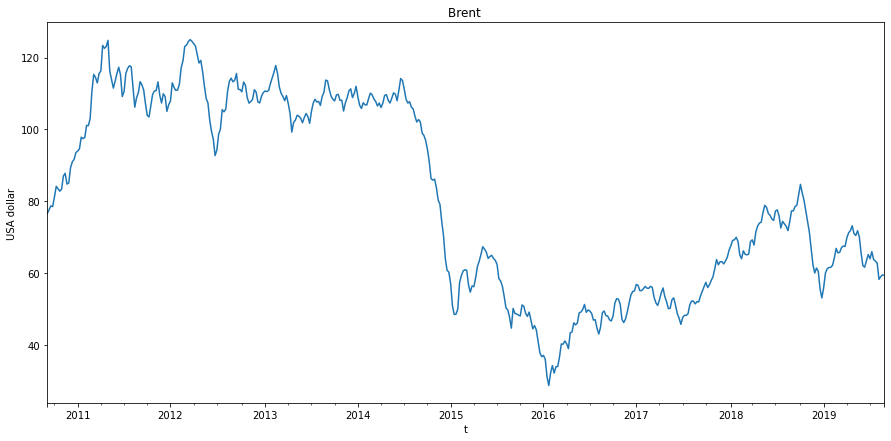

In [11]:
_ = w_brent_data['Значение'].plot(figsize=( 15, 7 ), title='Brent ')
plt.ylabel('USA dollar')
plt.xlabel('t')

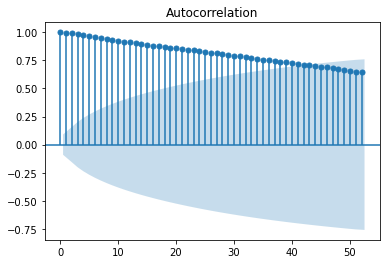

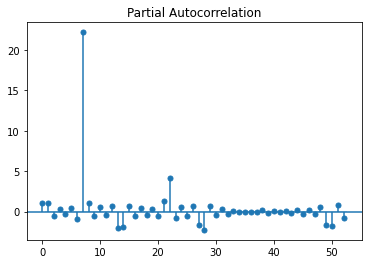

In [12]:
sm.graphics.tsa.plot_acf(w_brent_data['Значение'].values, lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(w_brent_data['Значение'].values, lags=52)
plt.show()

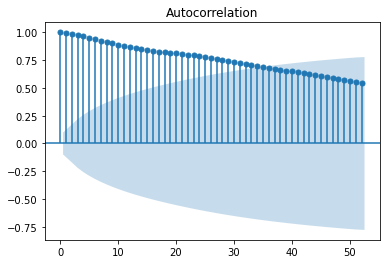

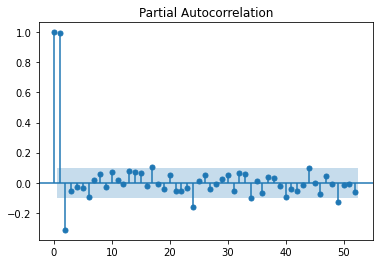

In [13]:
# возьмем значения после пропуска
sm.graphics.tsa.plot_acf(w_brent_data['Значение'].values[75:], lags=52)
plt.show()
sm.graphics.tsa.plot_pacf(w_brent_data['Значение'].values[75:], lags=52)
plt.show()

На графике ACF видим значительную автокорреляцию с медленным падением связи. Для разностей высокое значение в районе обработанного пропуска, также значение возрастает там, где было резкое падение цены. Есть три места с двумя точками с высокими отрицательными разностями, видимо, соответствуют падениям на графике значений.

Наибольшая схожесть:
p = 2 : ACF имеет форму синусоиды или экспоненциально убывает, PACF имеет резко выделяющиеся значения на лагах 1, 2, нет корреляций на других лагах.

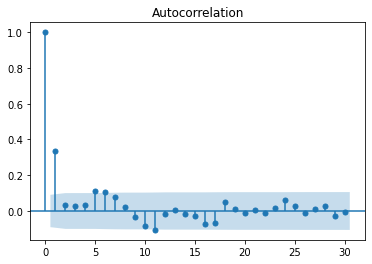

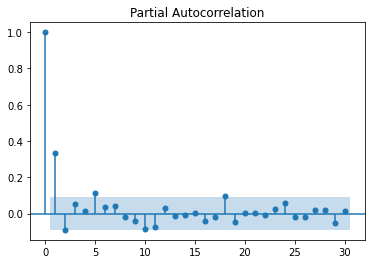

In [14]:
w_brent_dif = w_brent_data['Значение'].diff(1)

sm.graphics.tsa.plot_acf(w_brent_dif[1:], lags=30)
plt.show()
#plt.subplot(2,1,2)
sm.graphics.tsa.plot_pacf(w_brent_dif[1:], lags=30)
plt.show()

Сезона нет.
ACF - медленно падает для недельных графиков, а для первых разностей ACF - быстро падает (не более 1-й высокой корреляции)
PACF - быстро пададает, а для первых разностей РACF - быстро падает (не более высокой 1-й корреляции)
q , p - берем р=2 (PACF) , q =1 (скорее всего не очень большой после производной)
ADF - 1 раз интегрируемый - d = 1
Запустим модель без сезонного анализа (ARIMA)

In [17]:
# Определим p, d и q 
q = 1
p = 2
d = 1
pdq = [p, d, q]

N2=12

# возьмем данные после пропуска
modb = sm.tsa.statespace.SARIMAX(w_brent_data['Значение'].values[75:-N2],
                               order=pdq,seasonal_order=[0,0,0,0], trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb = modb.fit()
print('ARIMA{} - AIC:{}'.format(pdq, resultsb.aic))

print(resultsb.summary().tables[0],resultsb.summary().tables[1])

ARIMA[2, 1, 1] - AIC:1593.7170097038386
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  383
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -790.859
Date:                Tue, 04 Aug 2020   AIC                           1593.717
Time:                        10:42:27   BIC                           1617.358
Sample:                             0   HQIC                          1603.098
                                - 383                                         
Covariance Type:                  opg                                         
============================================================================== ==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   

In [19]:
# Для подбора оптимальных значений параметров модели временного ряда ARIMA (p, d, q), используем сеточный поиск
# Определим d и q в диапазоне 0-3, p в диапазоне 0-5
d = range(0, 3)
p = range(0, 5) 
q = range(0, 3)
# зададим сетку p, q и q
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [0,0,0,0] # нет сезона

for param in pdq:
    param_seasonal = seasonal_pdq
    try:
        mod_b = sm.tsa.statespace.SARIMAX(w_brent_data['Значение'].values[75:-N2],
                                          order=param,seasonal_order=[0,0,0,0],trend='ct',
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)

        results_ = mod_b.fit()
        print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_.aic))
    except:
        continue

ARIMA(0, 0, 0)x[0, 0, 0, 0] - AIC:3333.9304967053718
ARIMA(0, 0, 1)x[0, 0, 0, 0] - AIC:2841.891693088973
ARIMA(0, 0, 2)x[0, 0, 0, 0] - AIC:2546.734209644436
ARIMA(0, 1, 0)x[0, 0, 0, 0] - AIC:1648.9473075284377
ARIMA(0, 1, 1)x[0, 0, 0, 0] - AIC:1584.6728720147257
ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:1582.160436056528
ARIMA(0, 2, 0)x[0, 0, 0, 0] - AIC:1728.168151304944
ARIMA(0, 2, 1)x[0, 0, 0, 0] - AIC:1637.1178662664997
ARIMA(0, 2, 2)x[0, 0, 0, 0] - AIC:1588.0660794979528
ARIMA(1, 0, 0)x[0, 0, 0, 0] - AIC:1654.5639718419275
ARIMA(1, 0, 1)x[0, 0, 0, 0] - AIC:1592.8396497697931
ARIMA(1, 0, 2)x[0, 0, 0, 0] - AIC:1585.6958315657125
ARIMA(1, 1, 0)x[0, 0, 0, 0] - AIC:1592.895679188639
ARIMA(1, 1, 1)x[0, 0, 0, 0] - AIC:1585.5617886806695
ARIMA(1, 1, 2)x[0, 0, 0, 0] - AIC:1588.235378196467
ARIMA(1, 2, 0)x[0, 0, 0, 0] - AIC:1701.7100774050691
ARIMA(1, 2, 1)x[0, 0, 0, 0] - AIC:1612.4247380595807
ARIMA(1, 2, 2)x[0, 0, 0, 0] - AIC:1590.8742949464986
ARIMA(2, 0, 0)x[0, 0, 0, 0] - AIC:1592.417580913399


Поиск по сетке определяет модель ARIMA(0, 1, 2)x[0, 0, 0, 0] - AIC:1582.160436056528 (есть значение критерия еще меньше - ARIMA(4, 0, 0)x[0, 0, 0, 0] - AIC:1581.6275894188939, но это усложнение)

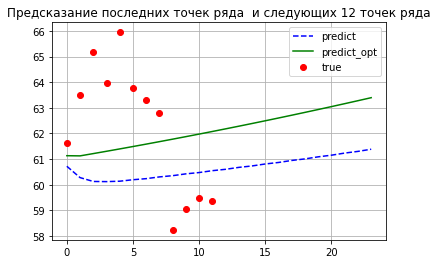

In [21]:
nforecast = N2+12

modb_opt = sm.tsa.statespace.SARIMAX(w_brent_data['Значение'].values[75:-N2],
                               order=[0,1,2],seasonal_order=[0,0,0,0],trend='ct',
                               enforce_stationarity=False,
                               enforce_invertibility=False)
resultsb_opt = modb_opt.fit()
pred_dynamic = resultsb.forecast(nforecast)    #делаем предсказание c 12 точки от текущего конца ряда
pred_dynamic_opt = resultsb_opt.forecast(24) 

plt.plot(pred_dynamic,'--b', label='predict' )
plt.plot(pred_dynamic_opt,'g', label='predict_opt' )
#Отобразим истинныe значения 
plt.plot(w_brent_data['Значение'].values[-N2:],'or',label='true')
plt.title('Предсказание последних точек ряда  и следующих 12 точек ряда')
plt.legend()
plt.grid()
plt.show()

In [23]:
resultsb_opt.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
intercept,-0.4237,0.276,-1.537,0.124,-0.964,0.116
drift,0.0013,0.001,1.021,0.307,-0.001,0.004
ma.L1,0.4067,0.051,7.987,0.000,0.307,0.506
ma.L2,0.0477,0.051,0.941,0.347,-0.052,0.147
sigma2,3.7064,0.247,15.026,0.000,3.223,4.190


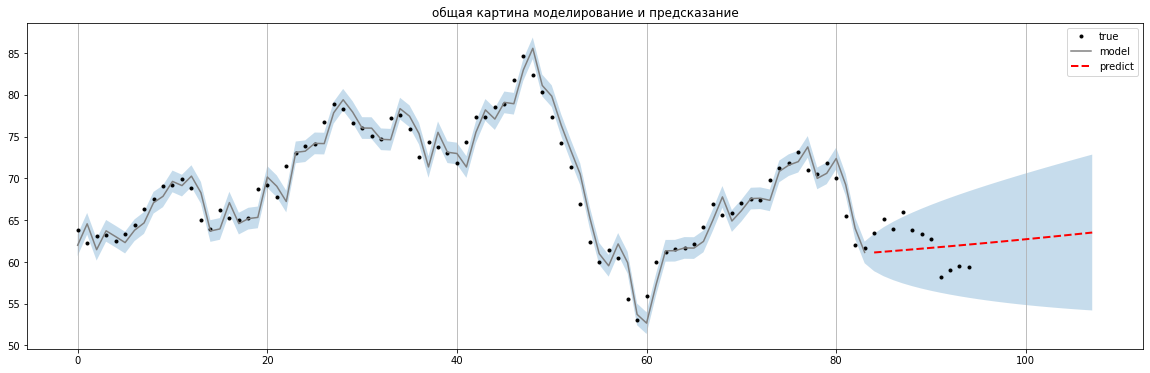

In [38]:
N3=300
nforecast = N2+12  # общее число точек для предсказания (N2 - тестовых точек + точки для чистого предсказания)
predict_ = resultsb_opt.get_prediction(end=resultsb_opt.nobs + nforecast)  # делаем предсказание

# отображаем
idx = np.arange(len(predict_.predicted_mean)-N3)
predict_ci = predict_.conf_int(alpha=0.5)

#
fig, ax = plt.subplots(figsize=(20,6))
ax.xaxis.grid()
ax.plot(w_brent_data['Значение'].values[N3+75:], 'k.',label='true')

# 
ax.plot(idx[:-nforecast], predict_.predicted_mean[N3:-nforecast], 'gray',label = 'model')
ax.plot(idx[-nforecast:], predict_.predicted_mean[-nforecast:], 'r--', linestyle='--', linewidth=2, label='predict')
ax.fill_between(idx, predict_ci[N3:, 0], predict_ci[N3:, 1], alpha=0.25)
plt.legend()
ax.set(title='общая картина моделирование и предсказание');

 5. Оцените результат моделирования

In [27]:
adf_test = sm.tsa.stattools.adfuller(resultsb_opt.resid)
print(adf_test)

(-62.266086098365996, 0.0, 0, 382, {'1%': -3.4475850438570115, '5%': -2.869135963767125, '10%': -2.5708164748773332}, 1518.420663893414)


ADF тест (adf_test[1] = 0) показывает, что пока остатки являются стационарным рядом,и хотя модель требует доработки, она отвечает на вопрос о поведении ряда во времени. Это значит, что можно уверенно прогнозировать - значения модели в диапазоне дисперсии остатков.

Видим, что предсказательная способность модели хуже, чем у модели предсказания потребления энергии, но большая часть точек попадает в доверительный интервал.

 6. Сделайте предположение о моделях, которые лучше работают с техниками регрессии на основе AR I MA.

Чем ближе ряд или его производные к стационарному, тем лучше будет работать модель.